# Setup

In [2]:
!pip install wordcloud


In [4]:
!pip install seaborn


# Sentiment Analysis using Naive Bayes Classifier

In [5]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# This command ensures that plots appear inline in Jupyter notebooks
%matplotlib inline


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

file = "balanced_dataset.csv"
file = r"C:\Users\Shubham Yadav\Desktop\Minor Project\balanced_dataset.csv" # location


In [7]:
df = pd.read_csv('balanced_dataset.csv')

In [8]:
df.columns



Index(['Rate', 'Review', 'Summary', 'sentiment'], dtype='object')

In [9]:
df = df.drop('Rate', axis=1)


In [12]:
df = df.rename(columns={'Review': 'text'})
df.sample(20)

,text,Summary,sentiment
21350,Nice product,Definitely a good product sofar..worth buying for this price,1
20808,Must buy!,It's very good ð,1
53489,Horrible,Water dropping from deep freezer and the technician is saying it is the issue with all samsung refiregator as the compressor is on both the sides. If this is with all samsung refrigerator i wont buy samsung,0
59182,Good,Installation is not good,0
4411,Value-for-money,Simply... good... product..,1
56700,Good,Very bade product.I m not satisfied,0
46457,Could be way better,Don't buy this.....its not hybrid... flower is not good,0
60072,Don't waste your money,"Description written is misleading, Kent Ace 8L RO + UV + UF + TDS water purifier. It must be clearly written in heading description that âUV in tankâ, like other RO products from Kent and other brands. I came to know this after I received the order.",0
14347,Brilliant,The experience I had is amazing with this iPad. Specially meant for the digital artists.,1
49871,Nan,The cloth was very low quality I fell bad,0


In [13]:
import json

with open('C:\\Users\\Shubham Yadav\\Desktop\\Minor Project\\contractions.json', 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict['contractions']


In [16]:
review_data = df.columns.values[0]
sentiment = df.columns.values[2]
review_data, sentiment

('text', 'sentiment')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60898 entries, 0 to 60897
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       60897 non-null  object
 1   Summary    60895 non-null  object
 2   sentiment  60898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [18]:
def emoji(review_data):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    review_data = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', review_data)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    review_data = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', review_data)
    # Love -- <3, :*
    review_data = re.sub(r'(<3|:\*)', ' positiveemoji ', review_data)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    review_data = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', review_data)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    review_data = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', review_data)
    # Cry -- :,(, :'(, :"(
    review_data = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', review_data)
    return review_data

In [23]:
import re

def process_review_data(review_data):
    if not isinstance(review_data, str):  # Check if review_data is a string
        return ""  # Return an empty string or handle it in your preferred way

    review_data = review_data.lower()                                             # Lowercases the string
    review_data = re.sub(r'@[^\s]+', '', review_data)                             # Removes usernames
    review_data = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', review_data)   # Remove URLs
    review_data = re.sub(r"\d+", " ", review_data)                               # Removes all digits
    review_data = re.sub(r'&quot;', " ", review_data)                           # Remove (&quot;) 
    review_data = emoji(review_data)                                             # Replaces Emojis
    review_data = re.sub(r'\b[a-zA-Z]\b', '', review_data)                      # Removes all single characters
    for word in review_data.split():
        if word.lower() in contractions:
            review_data = review_data.replace(word, contractions[word.lower()])   # Replaces contractions
    review_data = re.sub(r"[^\w\s]", " ", review_data)                          # Removes all punctuations
    review_data = re.sub(r'(.)\1+', r'\1\1', review_data)                        # Convert more than 2 letter repetitions to 2
    review_data = re.sub(r"\s+", " ", review_data)                              # Replaces double spaces with single space    
    return review_data


In [26]:
df['processed_text'] = df['text'].apply(process_review_data)  # Replace 'Review' with your actual column name


In [31]:
df.sample(15)

,text,Summary,sentiment,processed_text
34646,Worst experience ever!,waste of money,0,worst experience ever
26227,Very Good,Well and good ???,1,very good
6023,Super!,"Good product for my choice, and delivery agent's behavior was very nice he also waiting around 15 minutes for me. ð",1,super
58859,Good,For cur go for it for home big no,0,good
14783,Highly recommended,Very useful for me.,1,highly recommended
33778,Don't waste your money,"Poor quality plastic used, got cracked after 2 weeks, fine dust is not removed, get dirty very fast, cleaning mop is difficult",0,don waste your money
34577,Not recommended at all,Weste mony,0,not recommended at all
4508,Must buy!,Looking nice and fast grinding,1,must buy
53826,Good,Great product,0,good
11509,Value-for-money,Average quality products ð,1,value for money


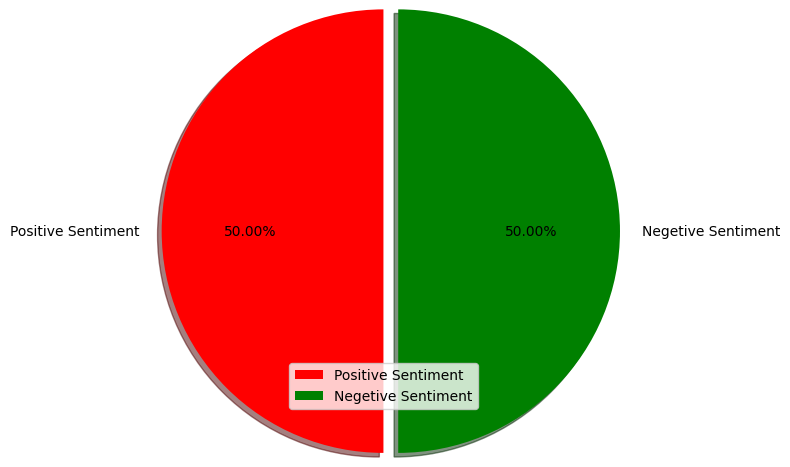

In [32]:
sentiments = ['Positive Sentiment', 'Negetive Sentiment']

slices = [(df[sentiment] != 0).sum(), (df[sentiment] == 0).sum()] 
colors = ['r', 'g'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), radius = 1.5, autopct = '%1.2f%%') 
plt.legend()
plt.show()


<Figure size 3840x2880 with 0 Axes>

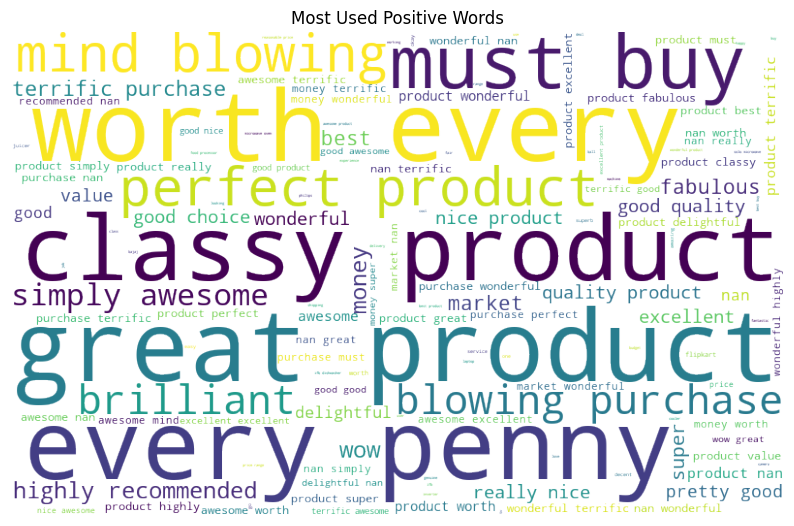

In [33]:
positive_words =' '.join([text for text in df['processed_text'][df[sentiment] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(positive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Positive Words")
plt.savefig('./positive_words.png')
plt.show()

<Figure size 3840x2880 with 0 Axes>

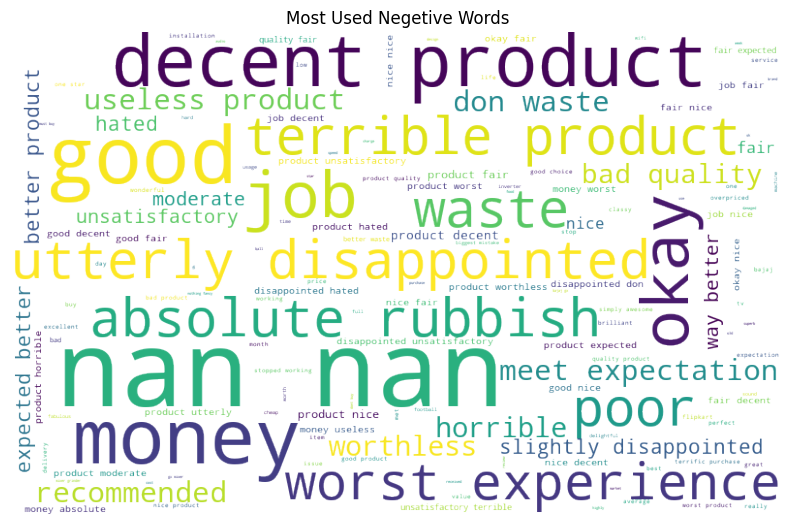

In [34]:
negetive_words =' '.join([text for text in df['processed_text'][df[sentiment] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, 
            max_font_size=110,background_color="rgba(255, 255, 255, 0)"
            , mode="RGBA").generate(negetive_words)
plt.figure(dpi=600)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Used Negetive Words")
plt.savefig('./negetive_words.png')
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(df['processed_text'])

final_vectorized_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 193538 stored elements and shape (60898, 3847)>

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df[sentiment],
                                                    test_size=0.2, random_state=69)

In [37]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (48718, 3847)
X_test_shape :  (12180, 3847)
y_train_shape :  (48718,)
y_test_shape :  (12180,)


In [38]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

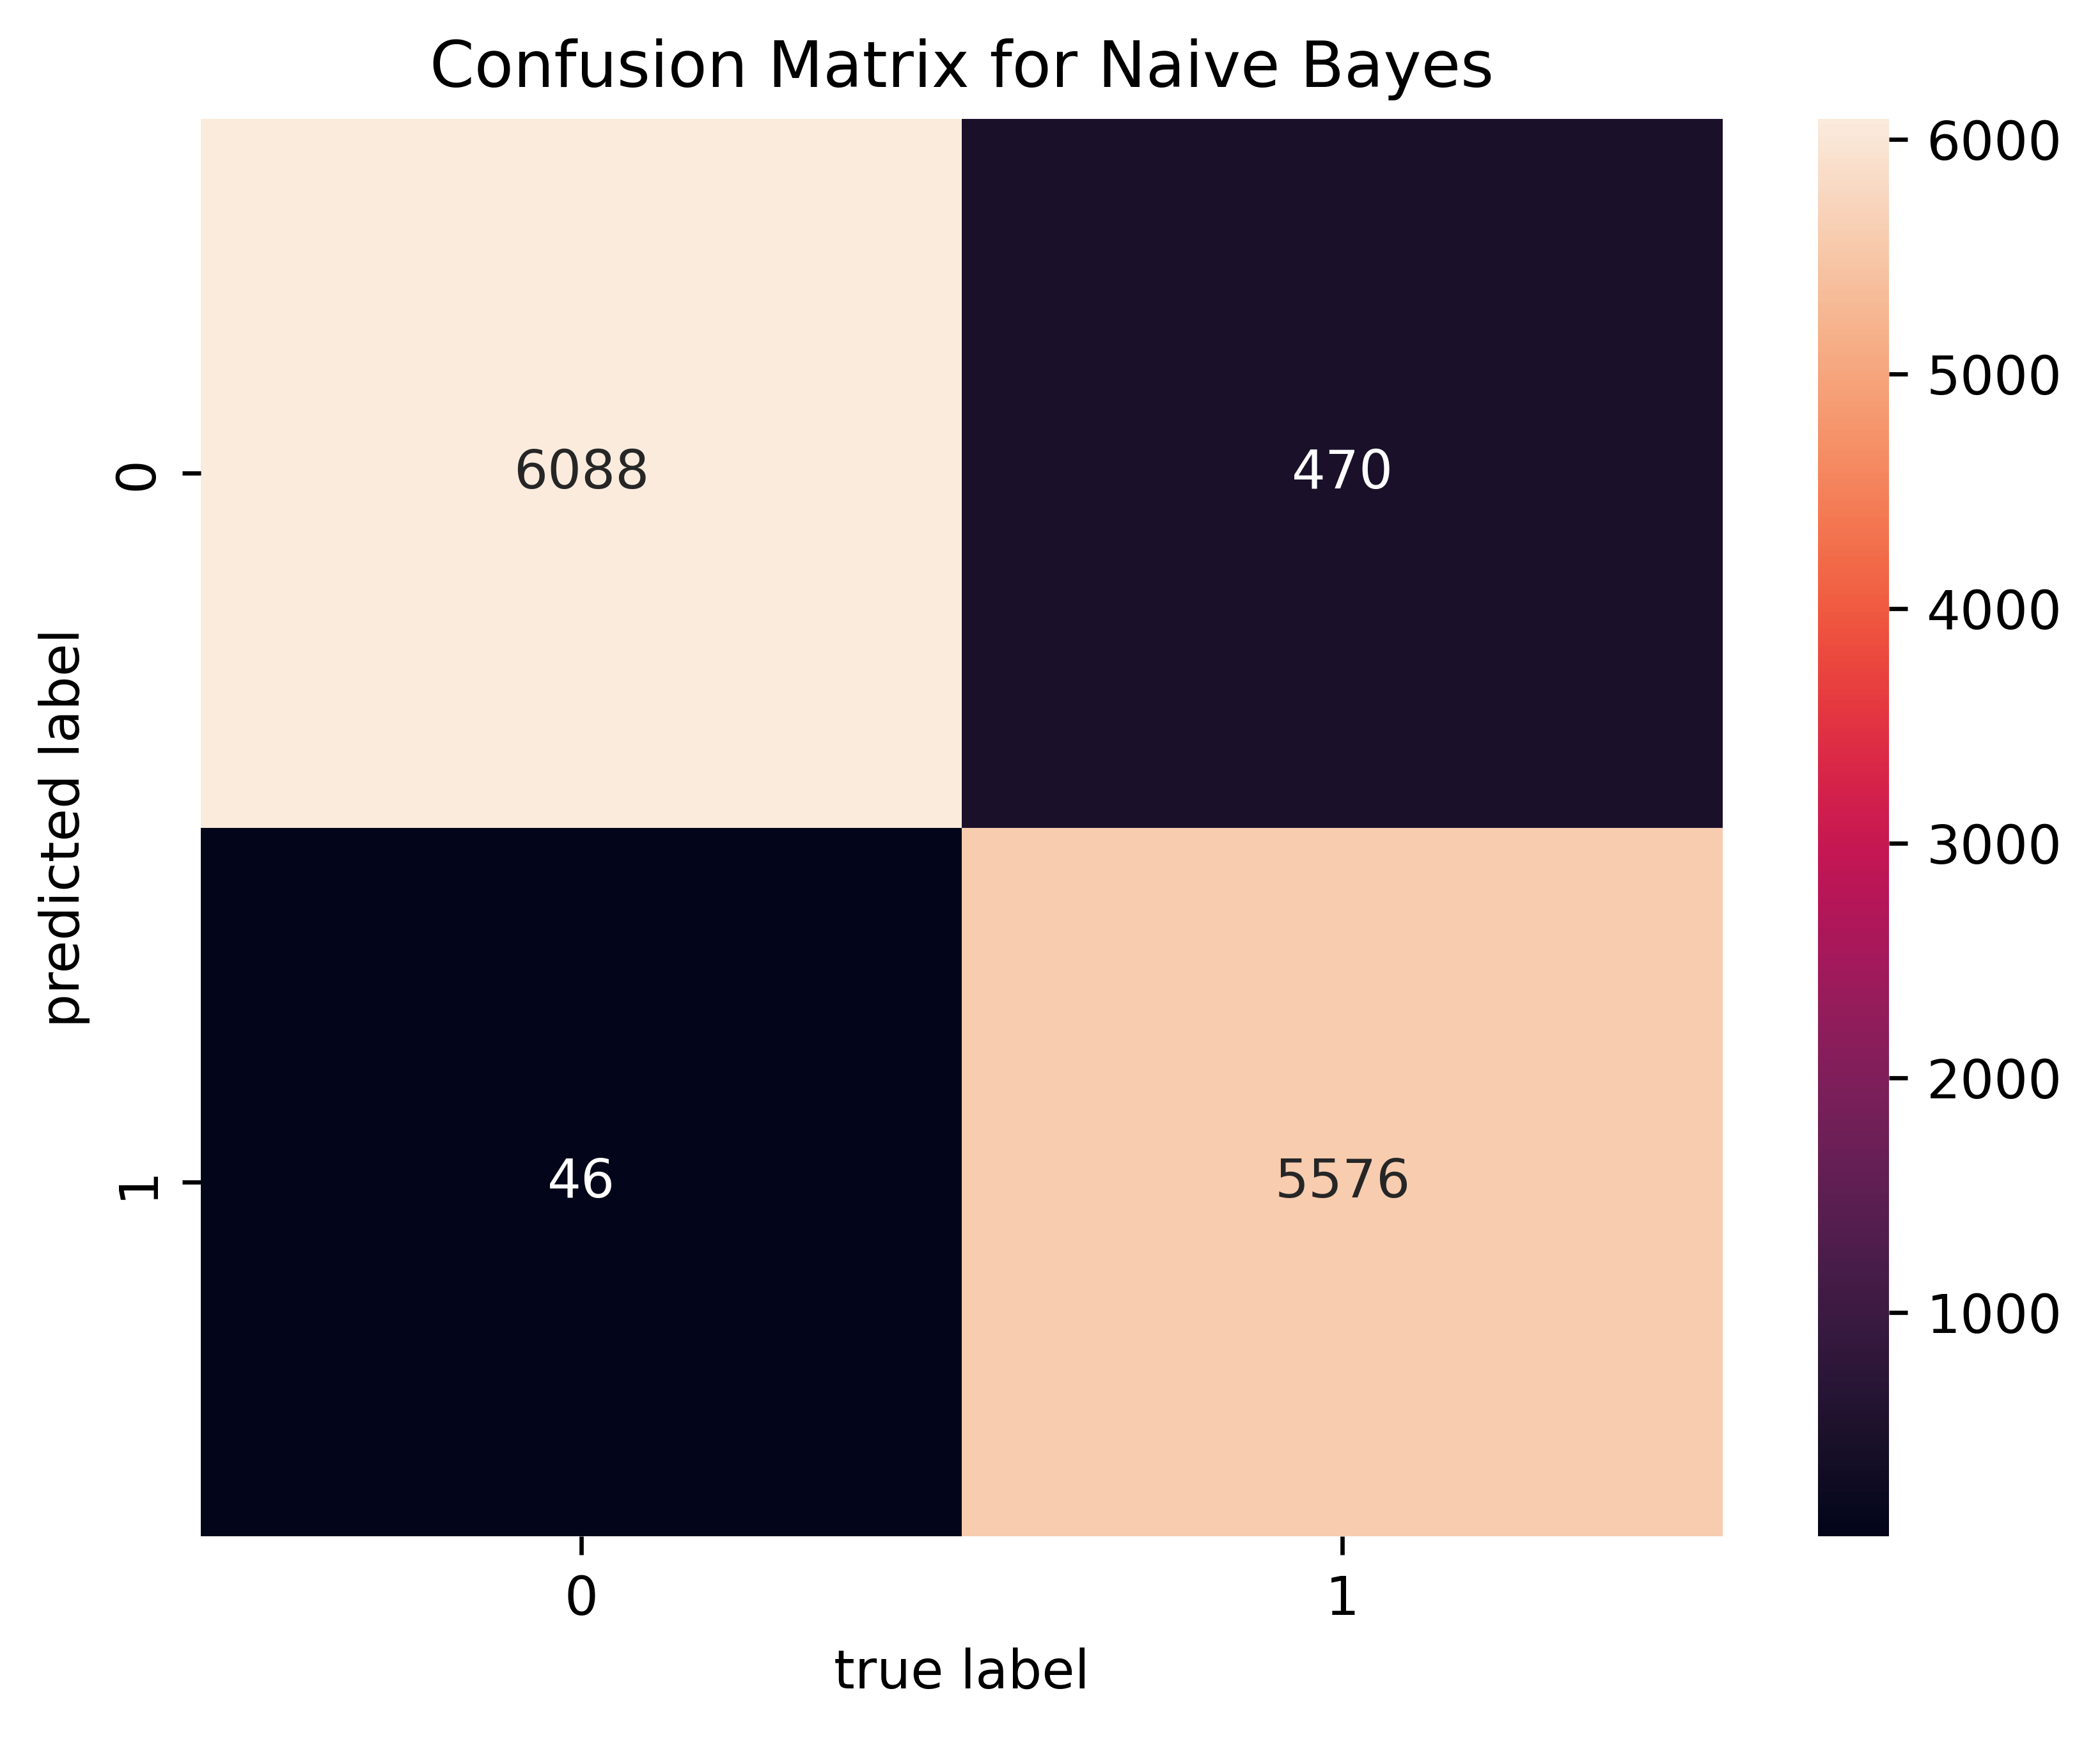

In [39]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=True)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("./confusion_matrix.png")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.9576354679802955


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6134
           1       0.99      0.92      0.96      6046

    accuracy                           0.96     12180
   macro avg       0.96      0.96      0.96     12180
weighted avg       0.96      0.96      0.96     12180



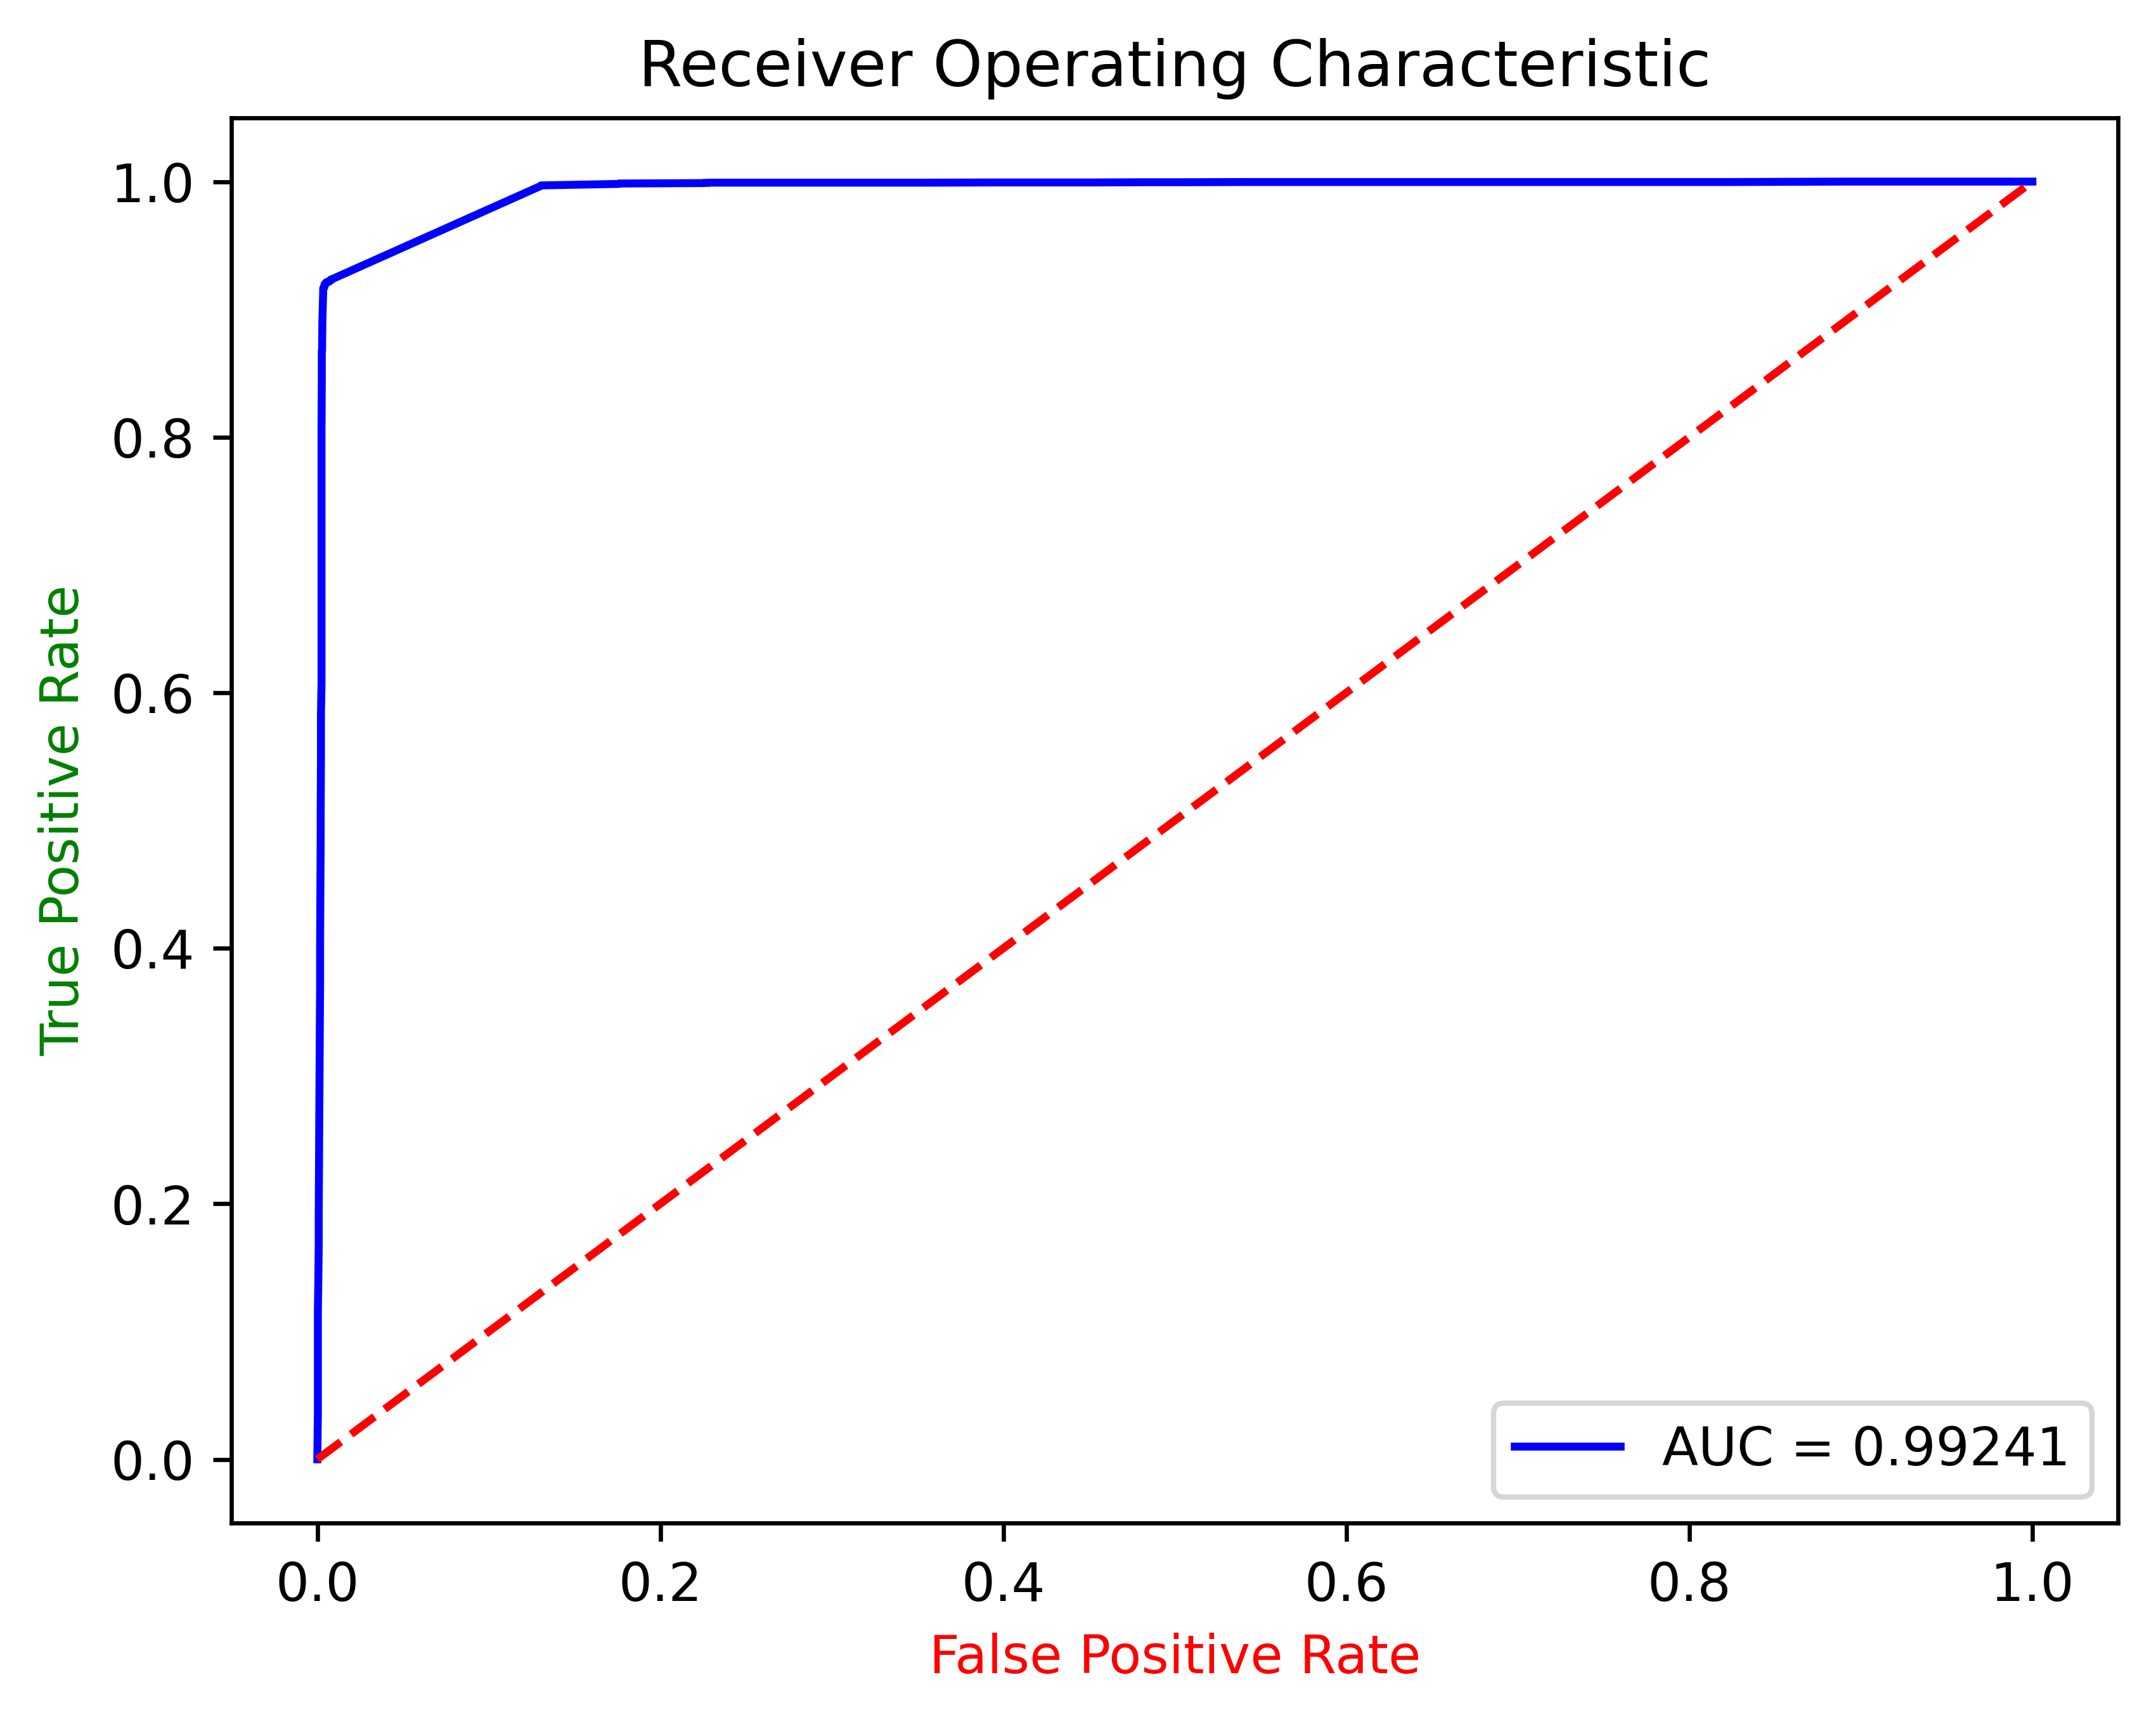

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.savefig("./ROC_curve.png")
plt.show()